# Assignment 2 - Supervised Machine Learning Fundamentals

## *Luopeiwen Yi*
Netid: ly178

Instructions for all assignments can be found [here](https://kylebradbury.github.io/ids705/notebooks/assignment_instructions.html).

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, coolwarm
import seaborn as sns
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import DecisionBoundaryDisplay
from warnings import filterwarnings

filterwarnings("ignore")

---

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. **Flexible Better Than Inflexible.** When the sample size is extremely large and the number of predictors is small, a flexible statistical learning method is expected to perform better than an inflexible method. The larger the sample size, the better we can represent the population during the training process. A larger sample size may reduce overfitting. Therefore, when the sample size is large and the number of predictors is small, a flexible statistical learning method can detect and model complex relationships between the predictors and the response without as much risk of overfitting during training. In other words, with a large amount of data, a more flexible model can effectively learn the true underlying patterns between predictors and response, thus performing better in testing.

2. **Flexible Worse Than Inflexible.** When the number of predictors is extremely large and the number of observations is small, a flexible statistical learning method is expected to perform worse than an inflexible method. Since the number of observations is small, there isn't enough data to learn all the complexities that a flexible method might try to model during training. A more flexible method might pick up too much on the noise or specific characteristics of the sample that do not generalize well to the overall population. Therefore, a more flexible method is likely to overfit the data during training, and thus performs worse in testing.

3. **Flexible Better Than Inflexible.** When the relationship between predictors and response is highly non-linear, a flexible statistical learning method is expected to perform better than an inflexible method. Inflexible methods, such as linear regression, cannot capture non-linearity between predictors and response beyond a certain point, which is likely to result in underfitting. In contrast, a more flexible method can more accurately model the complex relationships between predictors and response, thus reducing underfit during the training process and performing better in testing.

4. **Flexible Worse Than Inflexible.** If the variance of the error terms is extremely high, a flexible statistical learning method is expected to perform worse than an inflexible method. An extremely high variance suggests that there is a lot of unexplained variability in the data. An inflexible method might perform better in this case because it would not be as affected by the high error variance and would not fit the noise as much, which prevents overfit during training. In contrast, flexible methods can end up modeling this noise instead of the underlying true relationship and result in overfitting during training, thus performs worse in testing. 

---

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interested in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**


(a) 

(i) This scenario is a regression problem because the response variable is CEO salary, which is quantitative. 

(ii) We are most interested in inference for this problem because we want to understand the relationship between each factor and the CEO salary. 

(iii) The sample size n=500 since the data we collected are on the top 500 firms in the US. The predictors p=3, which are profit, number of employees, industry. 

(b) 

(i) This scenario is a classification problem because the response variable is the product's success or failure, which is binary (qualitative/categorical). 

(ii) We are most interested in prediction because we want to predict weather the new product will be a success or a failure in the future. 

(iii) The sample size n=20 since the data we collected are on 20 similar products that were previously launched. The predictors p=13, which are price charged for the product, marketing budget, competition price, and ten other variables.

(c) 

(i) This scenario is a regression problem because the outcome variable is the % change in the US dollar in relation to the weekly changes in the world stock markets, which is quantitative. 

(ii) We are most interested in prediction because we want to predict the % change in the US dollar in relation to the weekly changes in the world stock markets in the future. 

(iii) The sample size n=52 since there are total of [52 weeks in 2012](https://www.epochconverter.com/weeks/2012). The predictors p=3, which are the % change in the US market, the % change in the British market, and the % change in the German market.

---

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

In [91]:
X = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]])
y = np.array(["r", "r", "r", "b", "b", "r"])

# Define the test point
t = np.array([0, 0, 0])

# Compute the Euclidean distances between the test point and each observation in X
euclidean_distances = np.sqrt(((X - t) ** 2).sum(axis=1))

# Determine the ranks based on the Euclidean distances
# from closest to furthest
ranks = euclidean_distances.argsort().argsort() + 1

# Present answer in a table similar in style
# to Table 1 with observations 1-6 as the row headers.
distance_table = np.core.records.fromarrays(
    [np.arange(1, 7), euclidean_distances, y, ranks],
    names="Observation, Euclidean Distance From Test Point, Class, Rank",
)
distance_table

rec.array([(1, 3.        , 'r', 5), (2, 2.        , 'r', 3),
           (3, 3.16227766, 'r', 6), (4, 2.23606798, 'b', 4),
           (5, 1.41421356, 'b', 1), (6, 1.73205081, 'r', 2)],
          dtype=[('Observation', '<i8'), ('Euclidean Distance From Test Point', '<f8'), ('Class', '<U1'), ('Rank', '<i8')])

*Table 2. Training dataset with $n=6$ observations in $p=3$ dimensions with distance from the test point and a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | Euclidean Distance From Test Point | $y$   | Rank (Closest to Furthest)|
|------|-------|-------|-------|------------------------------------|-------|---------------------------|
| **1**| 0     | 3     | 0     |  3.00                              | Red   | 5                         |
| **2**| 2     | 0     | 0     |  2.00                              | Red   | 3                         |
| **3**| 0     | 1     | 3     |  3.16                              | Red   | 6                         |
| **4**| 0     | 1     | 2     |  2.24                              | Blue  | 4                         |
| **5**| -1    | 0     | 1     |  1.41                              | Blue  | 1                         |
| **6**| 1     | 1     | 1     |  1.73                              | Red   | 2                         |

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

When $K=1$, $\hat{y}$ = Blue. When $K=1$, we predict test point the same color as the nearest point to it. The closest point to our test point is observation 5, which is blue, with a distance of 1.41. Therefore, our prediction $\hat{y}$ for test point is blue.

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

When $K=3$, $\hat{y}$ = Red. When $K=3$, we identify the three closest neighbors to the test point and predict the test point's color based on the most frequent color among these neighbors. The three closest points to our test point are: observation 5, which is blue with a distance of 1.41; observation 6, which is red with a distance of 1.73; and observation 2, which is red with a distance of 2.00. The frequency of the color red among the three neighbors = 2/3, the frequency of the color blue among the three neighbors = 1/3. The frequency of the color red exceeds the frequency of the color blue. Therefore, our prediction $\hat{y}$ for test point is red.

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, we would expect the best value of $K$ to be small. The Bayes classifier produces the lowest possible test error rate, called the Bayes error rate. Therefore, a highly nonlinear Bayes decision boundary indicates the true relationship between predictors and response in this classification problem is highly non-linear. When the relationship between predictors and response is highly non-linear, a flexible statistical learning method is expected to perform better than an inflexible method. A more flexible method can more accurately model the complex relationships between predictors and response, thus reducing underfit during the training process and performing better in testing. In the KNN scenario, as the value of $K$ becomes smaller, the model becomes more flexible and better able to conform to complex, nonlinear decision boundaries. Therefore, we expect the best value of $K$ to be small.

---

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation? *Hint: your results should be identical to that of the scikit-learn implementation.*

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

**ANSWER**:

**(a)** Build a working version of a binary KNN classifier 

In [84]:
# kNN classifier
class Knn:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass

    def fit(self, x_train, y_train):
        # Save the training data to properties of this class
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)

    def predict(self, x_test, k):
        y_hat = []  # Variable to store the estimated class label for
        x_test = np.array(x_test)
        for i in range(len(x_test)):
            # Calculate the distance from each vector in x to the training data
            distance_array = np.sqrt(((self.x_train - x_test[i]) ** 2).sum(axis=1))
            # sort the distance_array by closest to furthest
            sorted_indices = np.argsort(distance_array)
            # get the labels of the k nearest neighbors
            label_sorted = self.y_train[sorted_indices]
            k_nearest_labels = []
            for a in range(k):
                k_nearest_labels.append(label_sorted[a][0])
            # k_nearest_labels = label_sorted[:k].flatten()
            # get the most common label
            prediction = max(set(k_nearest_labels), key=list(k_nearest_labels).count)
            y_hat.append(prediction)
        y_hat = np.array(y_hat)
        # Return the estimated targets
        return y_hat


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y_test, y_hat):
    y_test = np.array(y_test).flatten()
    nvalues = len(y_test)
    accuracy = sum(y_test == y_hat) / nvalues
    return accuracy

**(b)** Load the datasets to be evaluated here. 

In [92]:
# Load low dimensional data
X_train_low = pd.read_csv("A2_X_train_low.csv", header=None).values
y_train_low = pd.read_csv("A2_y_train_low.csv", header=None).values
X_test_low = pd.read_csv("A2_X_test_low.csv", header=None).values
y_test_low = pd.read_csv("A2_y_test_low.csv", header=None).values
# Load high dimensional data
X_train_high = pd.read_csv("A2_X_train_high.csv", header=None).values
y_train_high = pd.read_csv("A2_y_train_high.csv", header=None).values
X_test_high = pd.read_csv("A2_X_test_high.csv", header=None).values
y_test_high = pd.read_csv("A2_y_test_high.csv", header=None).values

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

In [4]:
# train the low dimensional data with k=5
knn_low = Knn()
start_low = time.time()
knn_low.fit(X_train_low, y_train_low)
y_hat_low = knn_low.predict(X_test_low, k=5)
end_low = time.time()
time_low = end_low - start_low
accuracy_low = accuracy(y_test_low, y_hat_low)
print(
    f"The time taken to make the predictions "
    f"for the low dimensional data is around {time_low:.2f} seconds."
)
print(
    f"The overall accuracy of the predictions "
    f"for the low dimensional data is around {100*accuracy_low:.2f}%."
)

# train the high dimensional data with k=5
knn_high = Knn()
start_high = time.time()
knn_high.fit(X_train_high, y_train_high)
y_hat_high = knn_high.predict(X_test_high, k=5)
end_high = time.time()
time_high = end_high - start_high
accuracy_high = accuracy(y_test_high, y_hat_high)
print(
    f"The time taken to make the predictions "
    f"for the high dimensional data is around {time_high:.2f} seconds."
)
print(
    f"The overall accuracy of the predictions "
    f"for the high dimensional data is around {100*accuracy_high:.2f}%."
)

The time taken to make the predictions for the low dimensional data is around 0.08 seconds.
The overall accuracy of the predictions for the low dimensional data is around 92.50%.
The time taken to make the predictions for the high dimensional data is around 0.20 seconds.
The overall accuracy of the predictions for the high dimensional data is around 99.30%.


**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. 

In [5]:
# Fitting low-dimensional classifier
KNeighbors_low = KNeighborsClassifier(n_neighbors=5)
start_low_KN = time.time()
KNeighbors_low.fit(X_train_low, y_train_low)
y_hat_low_KN = KNeighbors_low.predict(X_test_low)
end_low_KN = time.time()
time_low_KN = end_low_KN - start_low_KN
accuracy_low_KN = accuracy(y_test_low, y_hat_low_KN)

print(
    f"The time taken to make the predictions "
    f"for the low dimensional data using KNeighborsClassifier "
    f"is around {time_low_KN:.2f} seconds."
)

print(
    f"The overall accuracy of the predictions "
    f"for the low dimensional data using KNeighborsClassifier "
    f"is around {100*accuracy_low_KN:.2f}%."
)

# Fitting high-dimensional classifier.
KNeighbors_high = KNeighborsClassifier(n_neighbors=5)
start_high_KN = time.time()
KNeighbors_high.fit(X_train_high, y_train_high)
y_hat_high_KN = KNeighbors_high.predict(X_test_high)
end_high_KN = time.time()
time_high_KN = end_high_KN - start_high_KN
accuracy_high_KN = accuracy(y_test_high, y_hat_high_KN)

print(
    f"The time taken to make the predictions "
    f"for the high dimensional data using KNeighborsClassifier "
    f"is around {time_high_KN:.2f} seconds."
)

print(
    f"The overall accuracy of the predictions "
    f"for the high dimensional data using KNeighborsClassifier "
    f"is around {100*accuracy_high_KN:.2f}%."
)

The time taken to make the predictions for the low dimensional data using KNeighborsClassifier is around 0.02 seconds.
The overall accuracy of the predictions for the low dimensional data using KNeighborsClassifier is around 92.50%.
The time taken to make the predictions for the high dimensional data using KNeighborsClassifier is around 0.16 seconds.
The overall accuracy of the predictions for the high dimensional data using KNeighborsClassifier is around 99.30%.


In [6]:
# Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier].
print("Custom Knn Classifier:")
print(
    f"Low dimensional data: Time - {time_low:.2f}s, "
    f"Accuracy - {100*accuracy_low:.2f}%"
)
print(
    f"High dimensional data: Time - {time_high:.2f}s, "
    f"Accuracy - {100*accuracy_high:.2f}%"
)

print("\nScikit-learn KNeighborsClassifier:")
print(
    f"Low dimensional data: Time - {time_low_KN:.2f}s, "
    f"Accuracy - {100*accuracy_low_KN:.2f}%"
)
print(
    f"High dimensional data: Time - {time_high_KN:.2f}s, "
    f"Accuracy - {100*accuracy_high_KN:.2f}%"
)

Custom Knn Classifier:
Low dimensional data: Time - 0.08s, Accuracy - 92.50%
High dimensional data: Time - 0.20s, Accuracy - 99.30%

Scikit-learn KNeighborsClassifier:
Low dimensional data: Time - 0.02s, Accuracy - 92.50%
High dimensional data: Time - 0.16s, Accuracy - 99.30%


(i) Regarding accuracy, my custom KNN Classifier performs equally as well as the Scikit-learn KNeighborsClassifier for predictions on both low-dimensional (92.50% vs. 92.50%) and high-dimensional data (99.30% vs. 99.30%). 

(ii) Regarding computation time, the Scikit-learn KNeighborsClassifier is faster than my custom KNN Classifier for predictions on both low-dimensional (0.02s vs. 0.08s) and high-dimensional data (0.16s vs. 0.20s). The Scikit-learn KNeighborsClassifier is faster because it utilizes more efficient data structures and algorithms for nearest neighbor searches. Additionally, its tree-based methods for neighbor searches perform better in the context of high dimensionality, effectively reducing prediction time.

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

(i) There are several drawbacks to the prediction process being slow in supervised machine learning. In areas requiring real-time analysis, such as financial trading algorithms, prediction time needs to be as fast as possible to ensure timely decision-making. Similarly, automobiles require real-time predictions to ensure driving safety. In these scenarios, quick and timely responses are crucial for the system's effectiveness and safety. A slow prediction process can lead to delays in financial trading, potentially resulting in trading failures and market collapses, or it can lead to dangerous situations like car accidents in automobile driving. Furthermore, applications that involve direct user interaction, such as recommendation systems and search engines, require fast prediction times to ensure a good user experience. A slow prediction process can lead to low user satisfaction and result in the loss of customers and users.

(ii) Slow testing (inference) can be more problematic than slow training in some cases. For instance, when a model is trained infrequently but used for predictions regularly, slow testing speed can be more of an issue than slow training speed. In applications that require processing a high volume of data with low latency, such as processing individual user requests in a web application, high testing speed is crucial for a good user experience, while training speed is less critical.

---

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the decision boundaries in the rows and the columns in your figure? Which decision boundaries appear to best separate the two classes of data with respect to the training data? Which decision boundaries vary the most as the training data change? Which decision boundaries do you anticipate will generalize best to unseen data and why?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

In [41]:
# from matplotlib.colors import LinearSegmentedColormap

# newcmp = LinearSegmentedColormap.from_list(
# "new", [(r / 255, g / 255, b / 255), (r / 255, g / 255, b / 255)], N=2
# )

**ANSWER**

**(a)** Create a synthetic dataset (with both features and targets). 

In [4]:
# generate 1000 random samples.
X, y = make_moons(n_samples=1000, noise=0.35, random_state=42)

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.


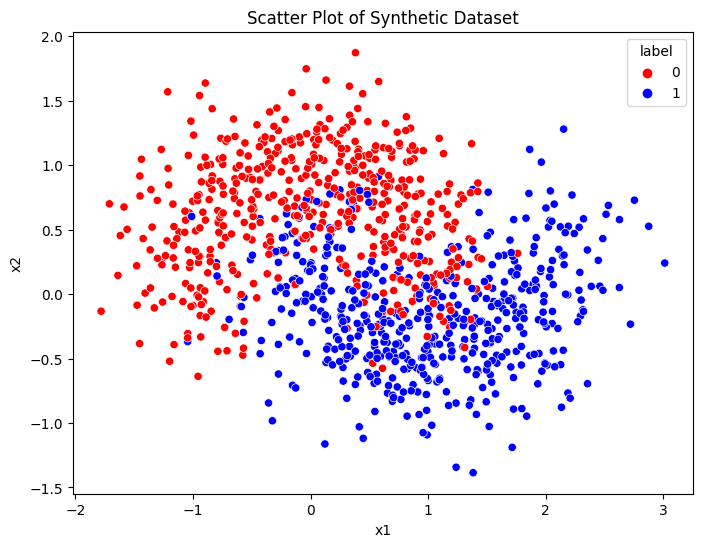

In [5]:
# Create DataFrame with the synthetic data
moon = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=y))

# Scatter plot using seaborn with dot markers
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=moon,
    x="x1",
    y="x2",
    hue="label",
    palette=["red", "blue"],
    markers=["o", "o"],
)
plt.title("Scatter Plot of Synthetic Dataset")
plt.show()

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

In [6]:
# Creating 3 different data subsets by selecting 100 data points at random three times (with replacement)
moon_subset_1 = moon.sample(n=100, replace=True, random_state=42)
moon_subset_2 = moon.sample(n=100, replace=True, random_state=43)
moon_subset_3 = moon.sample(n=100, replace=True, random_state=44)

# Displaying the first few rows of each subset for verification
moon_subset_1.head(), moon_subset_2.head(), moon_subset_3.head()

(           x1        x2  label
 102  1.955729  0.176347      1
 435  1.258178  0.283178      0
 860 -0.979632  0.332099      0
 270 -1.044216 -0.305603      0
 106 -0.066025  0.251422      1,
            x1        x2  label
 836  0.408884 -0.073877      1
 320  0.935009  0.149083      0
 255 -0.850850  1.006561      0
 817  0.645482 -0.439640      1
 277 -0.125476  0.121530      1,
            x1        x2  label
 788 -0.639553 -0.303837      0
 419 -1.363840  0.343504      0
 753 -0.836625  0.917531      0
 173  1.919019  0.438279      1
 571  0.478488 -0.006626      0)

In [7]:
# Fitting models on first subset
# k = 1
moon1_k1 = KNeighborsClassifier(n_neighbors=1)
moon1_k1.fit(moon_subset_1[["x1", "x2"]], moon_subset_1["label"])
# k = 25
moon1_k25 = KNeighborsClassifier(n_neighbors=25)
moon1_k25.fit(moon_subset_1[["x1", "x2"]], moon_subset_1["label"])
# k = 50
moon1_k50 = KNeighborsClassifier(n_neighbors=50)
moon1_k50.fit(moon_subset_1[["x1", "x2"]], moon_subset_1["label"])

# Fitting models on second subset
# k = 1
moon2_k1 = KNeighborsClassifier(n_neighbors=1)
moon2_k1.fit(moon_subset_2[["x1", "x2"]], moon_subset_2["label"])
# k = 25
moon2_k25 = KNeighborsClassifier(n_neighbors=25)
moon2_k25.fit(moon_subset_2[["x1", "x2"]], moon_subset_2["label"])
# k = 50
moon2_k50 = KNeighborsClassifier(n_neighbors=50)
moon2_k50.fit(moon_subset_2[["x1", "x2"]], moon_subset_2["label"])

# Fitting models on third subset
# k = 1
moon3_k1 = KNeighborsClassifier(n_neighbors=1)
moon3_k1.fit(moon_subset_3[["x1", "x2"]], moon_subset_3["label"])
# k = 25
moon3_k25 = KNeighborsClassifier(n_neighbors=25)
moon3_k25.fit(moon_subset_3[["x1", "x2"]], moon_subset_3["label"])
# k = 50
moon3_k50 = KNeighborsClassifier(n_neighbors=50)
moon3_k50.fit(moon_subset_3[["x1", "x2"]], moon_subset_3["label"])

KNeighborsClassifier(n_neighbors=50)

In [8]:
# put all the models in a dictionary
def fit_knn_models(subsets, k_values):
    models = {}
    for i, subset in enumerate(subsets, start=1):
        for k in k_values:
            model_name = f"moon{i}_k{k}"
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(subset[["x1", "x2"]], subset["label"])
            models[model_name] = knn
    return models


# For each of these 100-sample datasets
# fit three separate k-Nearest Neighbor classifiers with: k = {1, 25, 50}
models = fit_knn_models([moon_subset_1, moon_subset_2, moon_subset_3], [1, 25, 50])

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

Method 1

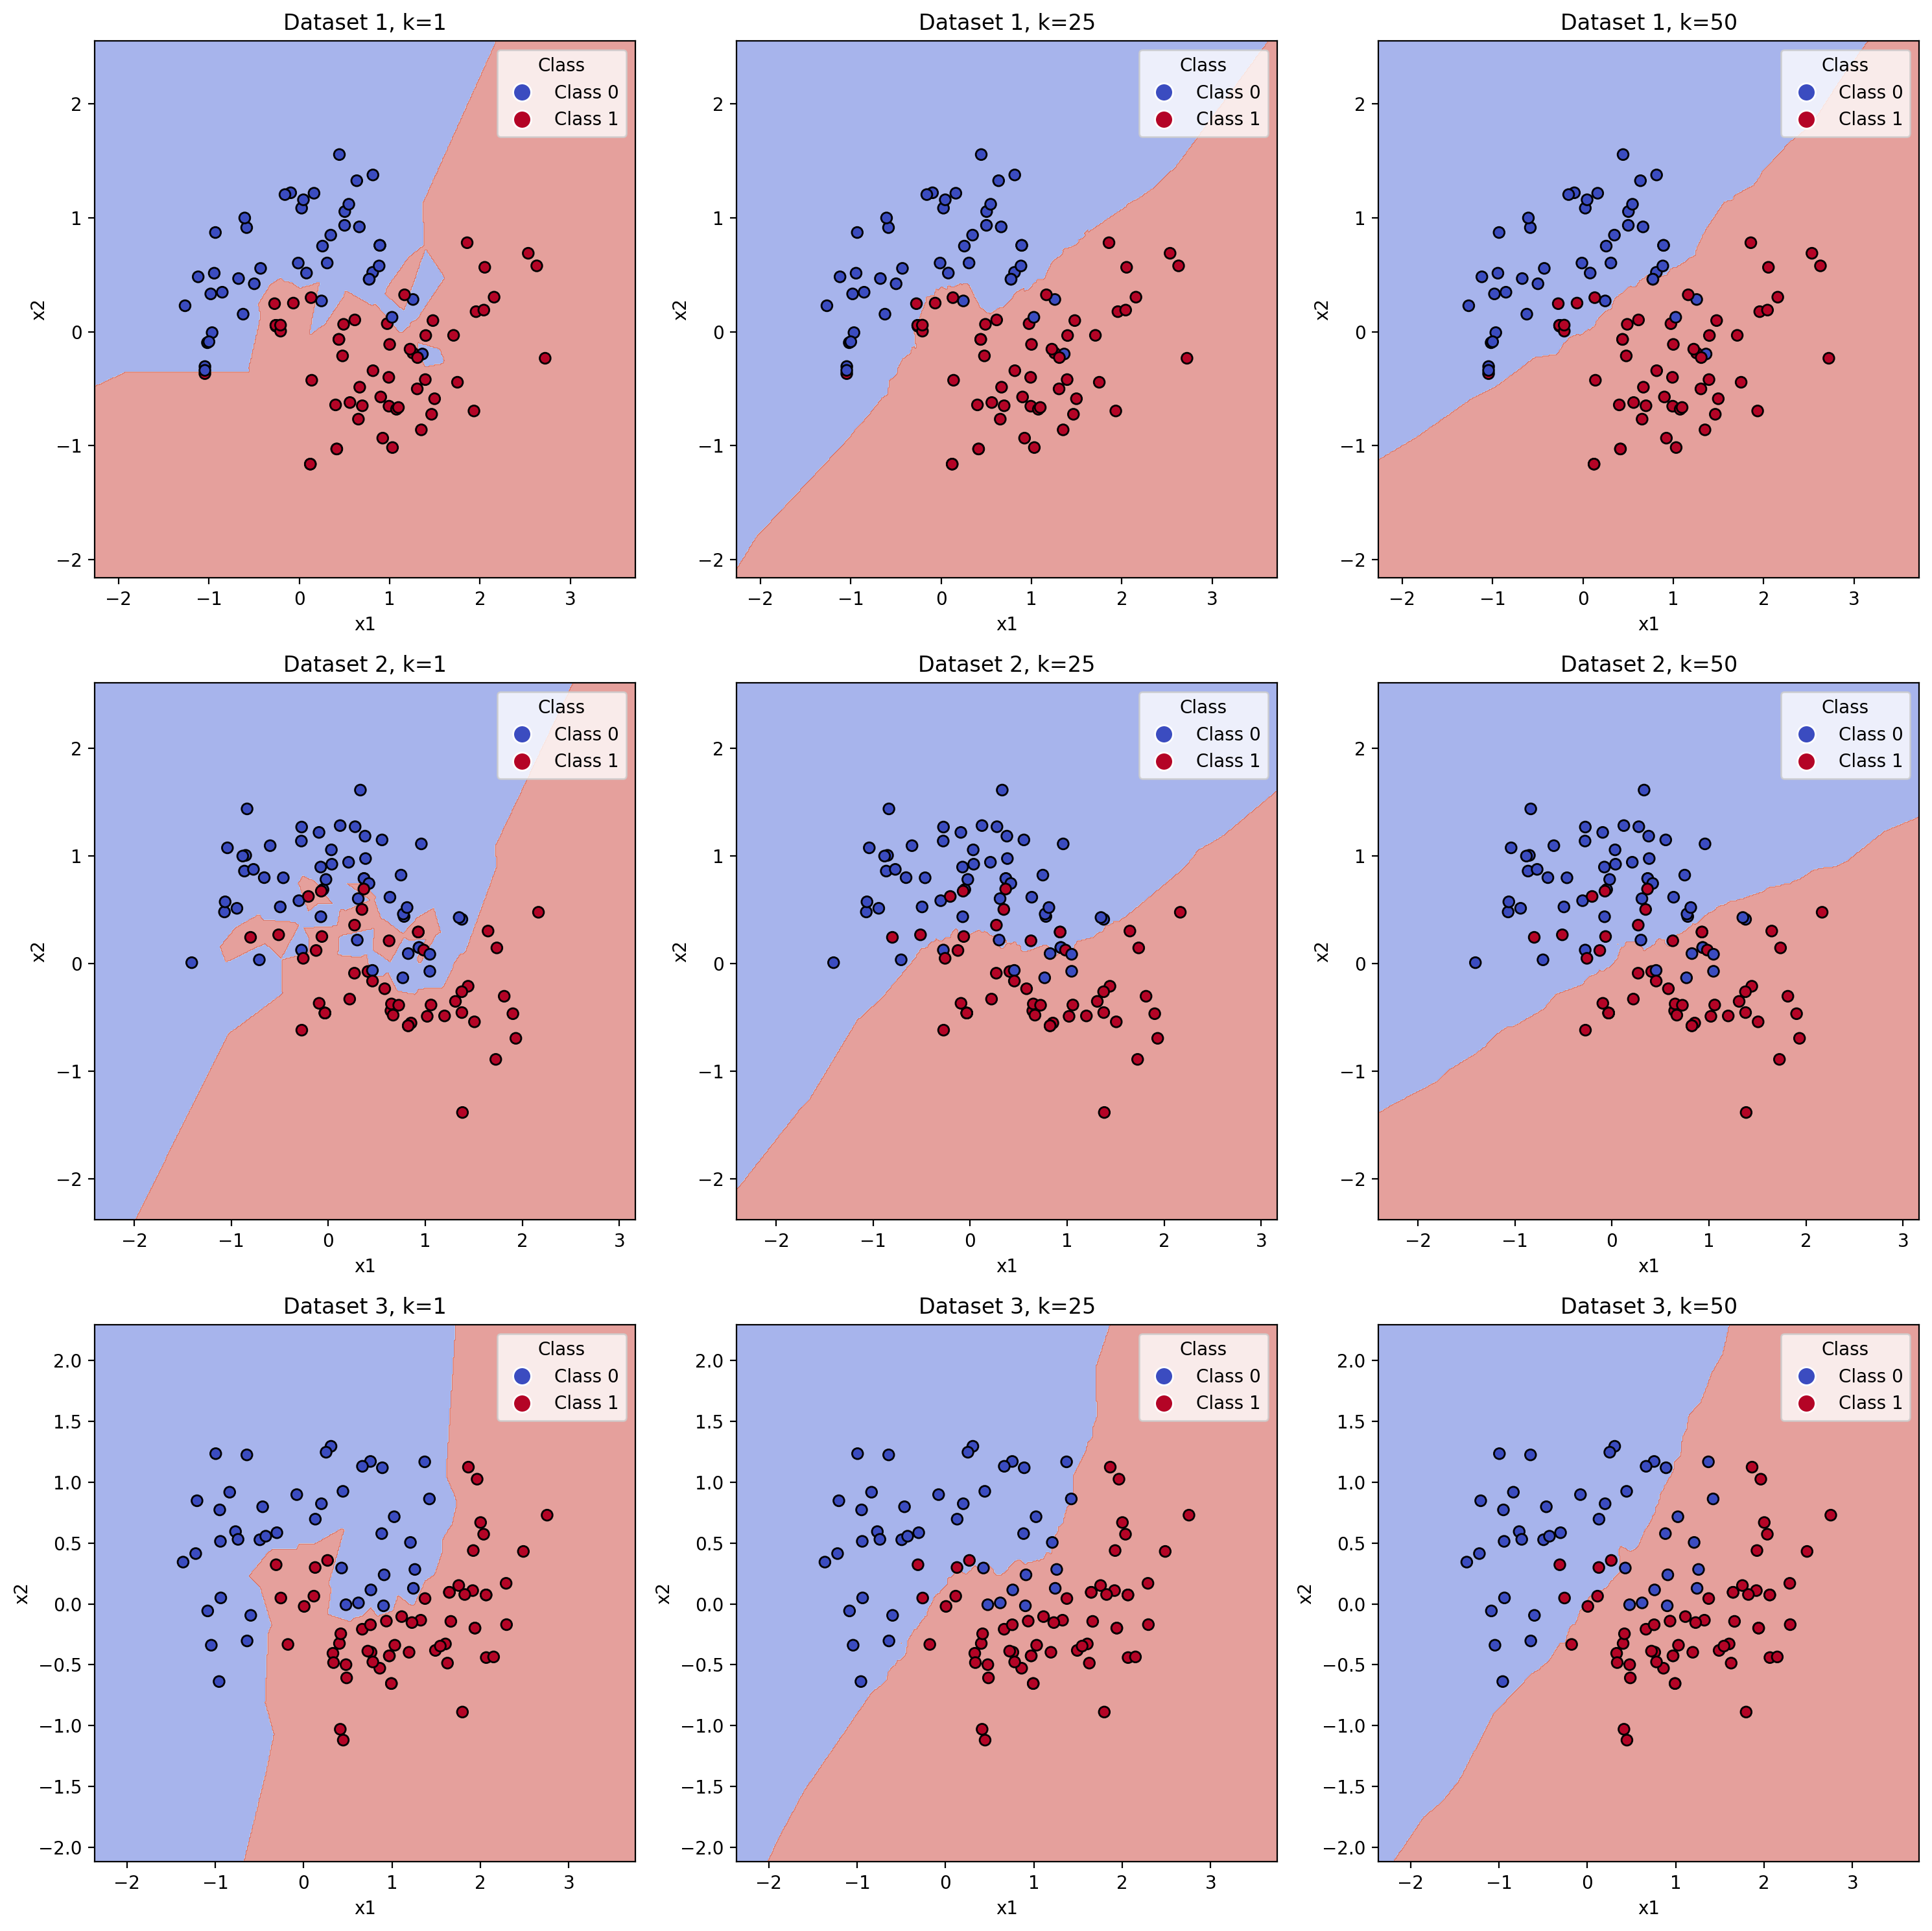

In [117]:
def plot_decision_boundaries(subsets, models, k_values):
    # Create a 3x3 grid of subplots
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    # Create a color map
    norm = Normalize(vmin=0, vmax=1)
    # Create a scalar mappable
    mapper = ScalarMappable(norm=norm, cmap="coolwarm")

    # Define legend handles with dots
    # matching coolwarm for binary classification
    legend_handles = [
        Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            markerfacecolor=mapper.to_rgba(0),
            markersize=10,
            label="Class 0",
            linestyle="None",
        ),
        Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            markerfacecolor=mapper.to_rgba(1),
            markersize=10,
            label="Class 1",
            linestyle="None",
        ),
    ]
    # Plotting decision boundaries
    for i, subset in enumerate(subsets, start=1):
        for j, k in enumerate(k_values, start=1):
            ax = axs[i - 1, j - 1]
            model = models[f"moon{i}_k{k}"]

            # Creating a mesh grid for plotting
            x_min, x_max = subset["x1"].min() - 1, subset["x1"].max() + 1
            y_min, y_max = subset["x2"].min() - 1, subset["x2"].max() + 1
            xx, yy = np.meshgrid(
                np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500)
            )

            # Predicting on the mesh grid
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

            # Plotting decision boundary and data points
            ax.contourf(xx, yy, Z, alpha=0.5, cmap="coolwarm")
            ax.scatter(
                subset["x1"],
                subset["x2"],
                c=subset["label"],
                edgecolors="k",
                cmap="coolwarm",
            )

            # Setting titles and labels
            ax.set_title(f"Dataset {i}, k={k}")
            ax.set_xlabel("x1")
            ax.set_ylabel("x2")

            # Adding legend
            ax.legend(handles=legend_handles, title="Class", loc="best")

    plt.tight_layout()
    plt.show()


# Plotting decision boundaries on the three subsets with k = 1, 25, 50
plot_decision_boundaries(
    [moon_subset_1, moon_subset_2, moon_subset_3], models, [1, 25, 50]
)

Method 2 Using DecisionBoundaryDisplay

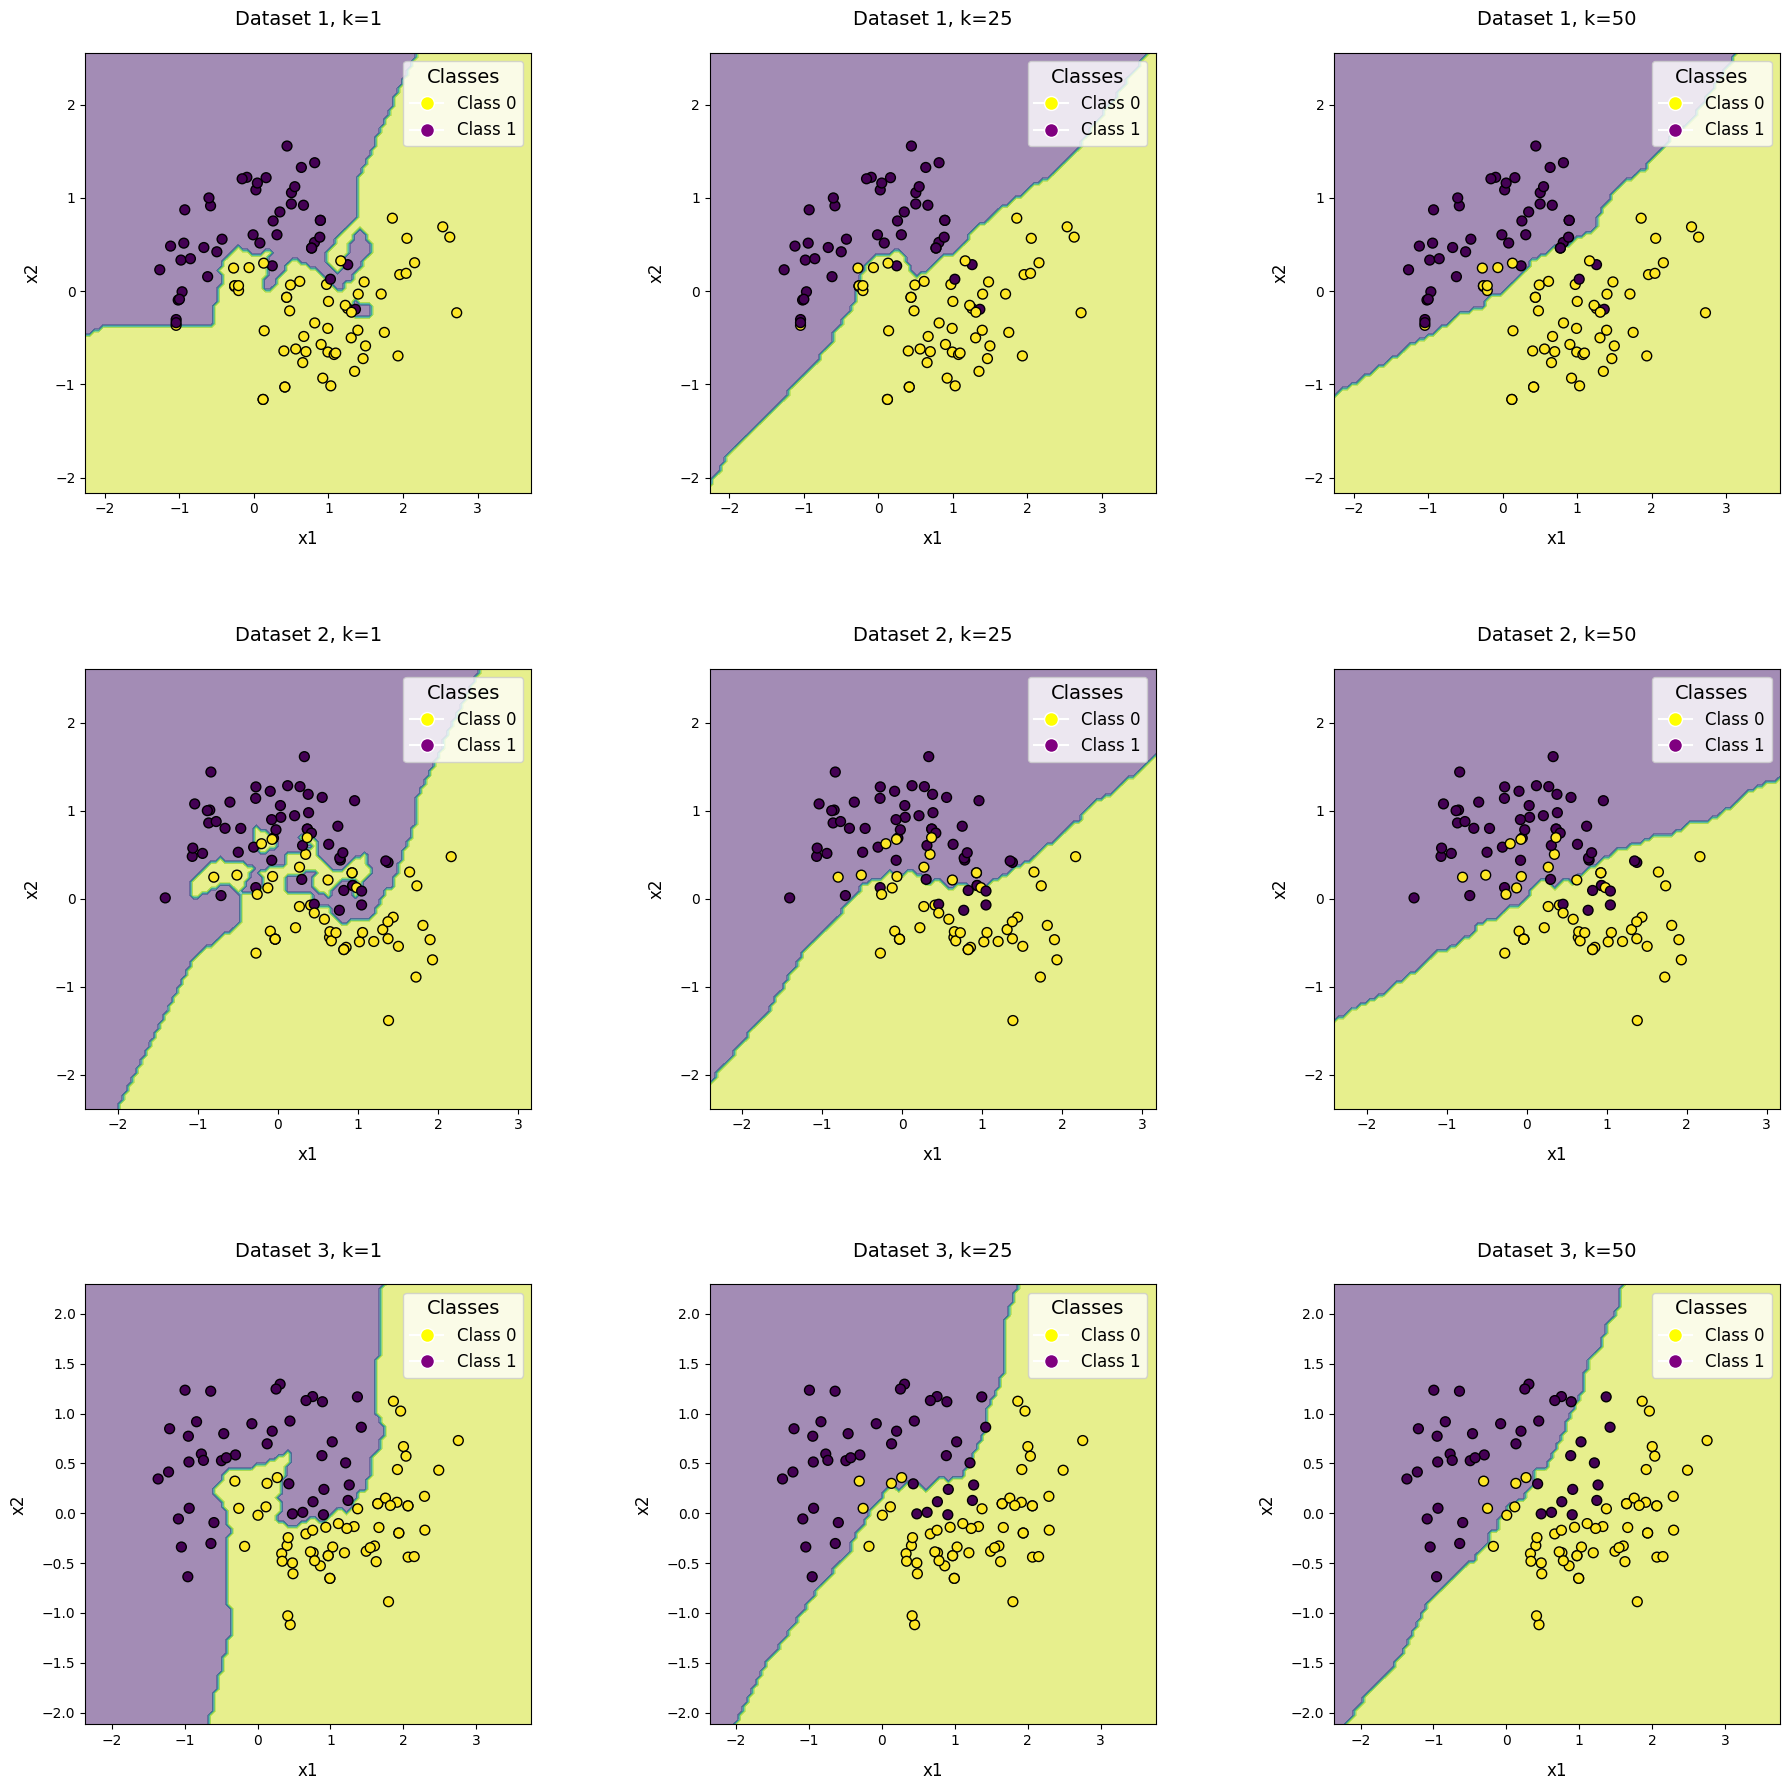

In [31]:
# Creating 3 different data subsets by selecting
# 100 data points at random three times (with replacement)
moon_subset_indices = [
    moon.sample(n=100, replace=True, random_state=random_state).index
    for random_state in [42, 43, 44]
]

k_values = [1, 25, 50]

# Adjust the figure size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

for i, subset_indices in enumerate(moon_subset_indices):
    X_subset = X[subset_indices]
    y_subset = y[subset_indices]

    for j, k in enumerate(k_values):
        # Initialize and fit the KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_subset, y_subset)

        # Plot decision boundary
        ax = axes[i, j]
        DecisionBoundaryDisplay.from_estimator(
            knn,
            X_subset,
            ax=ax,
            response_method="predict",
            alpha=0.5,
            cmap="viridis",
        )

        # Scatter plot of the points
        scatter = ax.scatter(
            X_subset[:, 0],
            X_subset[:, 1],
            c=y_subset,
            edgecolors="k",
            cmap="viridis",
            s=50,
        )

        # Set title and labels
        ax.set_title(f"Dataset {i+1}, k={k}", pad=20)
        ax.set_xlabel("x1", labelpad=10)
        ax.set_ylabel("x2", labelpad=10)

        # Adjust font size of the labels and title
        ax.title.set_fontsize(14)
        ax.xaxis.label.set_fontsize(12)
        ax.yaxis.label.set_fontsize(12)

        # Legend for the scatter points
        legend_labels = ["Class 0", "Class 1"]
        handles = [
            plt.Line2D(
                [0],
                [0],
                marker="o",
                color="w",
                label=label,
                markerfacecolor="yellow" if label == "Class 0" else "purple",
                markersize=10,
            )
            for label in legend_labels
        ]
        ax.legend(handles=handles, title="Classes", fontsize=12, title_fontsize=14)

# Adjust overall layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

**(e)** What do you notice about the difference between the decision boundaries in the rows and the columns in your figure? Which decision boundaries appear to best separate the two classes of data with respect to the training data? Which decision boundaries vary the most as the training data change? Which decision boundaries do you anticipate will generalize best to unseen data and why?

(i)

Row Comparison: 

For each dataset 1 to 3, as $k$ increases from 1 to 25 to 50, the decision boundaries becomes more and more linear, the model becomes less and less flexible. $k$ = 1 indicates the most flexible model that overfits the training data with the highest variance. $k$ = 50 indicates the most inflexible model that underfits the training data with the highest bias. 

Column Comparison: 

For $k$=1, from each dataset 1 to 3, the decision boundaries precisely classfies the two classes without any error. It is the most flexible model that overfits the training data with the highest variance.

For $k$=25, from each dataset 1 to 3, the decision boundaries classfies the two classes with a generally good accuracy rate. It is neither too flexible nor too inflexible, neither underfit (higher bias) or overfit (higher variance) the data, showing a good balance between bias and variance trade-off.

For $k$=50, from each dataset 1 to 3, the decision boundaries classfies the two classes with higher error rate. It is the most inflexible model that underfits the training data with the highest bias.

(ii)

Decision Boundary under $k$ =1 appear to best separate the two classes of data with respect to the training data.

(iii)

Decision Boundary under $k$ =1 vary the most as the training data change.

(iiii)

Decision Boundary under $k$ =25 will generalize best to unseen data because it's neither underfit (higher bias) or overfit (higher variance).

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

I explored the bias-variance tradeoff through the lens of $k$-nearest neighbors (k-NN) algorithm decision boundaries across three datasets, varying $k$ from 1 to 25 to 50.  $k=1$ gives the most flexible model, characterized by highly non-linear decision boundaries that adeptly classify the training data without error, demonstrating a propensity for overfitting with high variance and low bias. This high flexibility, while seemingly advantageous, results in a model that is overly tailored to the training data, potentially performing poorly on unseen data due to its sensitivity to noise. As $k$ increases to 25, the decision boundaries become more linear, indicating a decrease in model flexibility. This moderation in flexibility suggests a balanced model that neither overfits nor underfits the data, achieving a commendable balance in the bias-variance trade-off. The model with $k=25$ exemplifies an optimal trade-off, offering generally good accuracy rates by effectively classifying the two classes across datasets without adhering too closely to the training data's specific nuances or ignoring them entirely. Further increasing $k$ to 50 results in the most inflexible model, with highly linear decision boundaries that classify the two classes with a higher error rate. This model underfits the training data, characterized by high bias and low variance, indicating that it is too generalized, failing to capture the essential patterns in the data necessary for accurate classification.

Comparatively, the decision boundaries with $k=1$ closely conform to the training data, illustrating the concept of overfitting, where the model's high variance leads to poor generalization to new data. Conversely, with $k=50$, the decision boundaries vary significantly with changes in the training data, highlighting the issue of underfitting, where high bias prevents the model from adequately learning from the data. However, at $k=25$, the decision boundaries offer the best potential for generalizing to unseen data, as this setting provides a robust compromise between flexibility and generalization, neither overfitting nor underfitting the data.

When building the supervised machine learning model, choosing the best value of $k$ involves balancing the bias-variance trade-off. A smaller $k$ has low bias and high variance, fitting closely to the training data's nuances with high flexibility. A larger $k$ increases bias and reduces variance, potentially missing the complexity of the nonlinear decision boundary with low flexibility. It is important to choose a value of $k$ that neither underfit the training data with higher bias nor overfit the training data with higher variance, which builds a model that is neither too flexible nor too inflexible to generalize the best to unseen data. This balance is essential for developing effective machine learning models that perform well not just on the training data but also in real-world applications.

---

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)** Using the function created earlier to generate random samples, create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

In [99]:
# training set
X_train, y_train = make_moons(n_samples=1000, noise=0.35, random_state=42)
# test set
X_test, y_test = make_moons(n_samples=1000, noise=0.35, random_state=43)

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).


In [100]:
training_error = []
testing_error = []
for k in range(1, 501):
    finalmoon = KNeighborsClassifier(n_neighbors=k)
    finalmoon.fit(X_train, y_train)
    # training data classification error
    y_hat_train = finalmoon.predict(X_train)
    accuracy_moon_train = accuracy(y_train, y_hat_train)
    error_moon_train = 1 - accuracy_moon_train
    training_error.append(error_moon_train)
    # testing data classification error
    y_hat_test = finalmoon.predict(X_test)
    accuracy_moon_test = accuracy(y_test, y_hat_test)
    error_moon_test = 1 - accuracy_moon_test
    testing_error.append(error_moon_test)
training_error = np.array(training_error)
testing_error = np.array(testing_error)

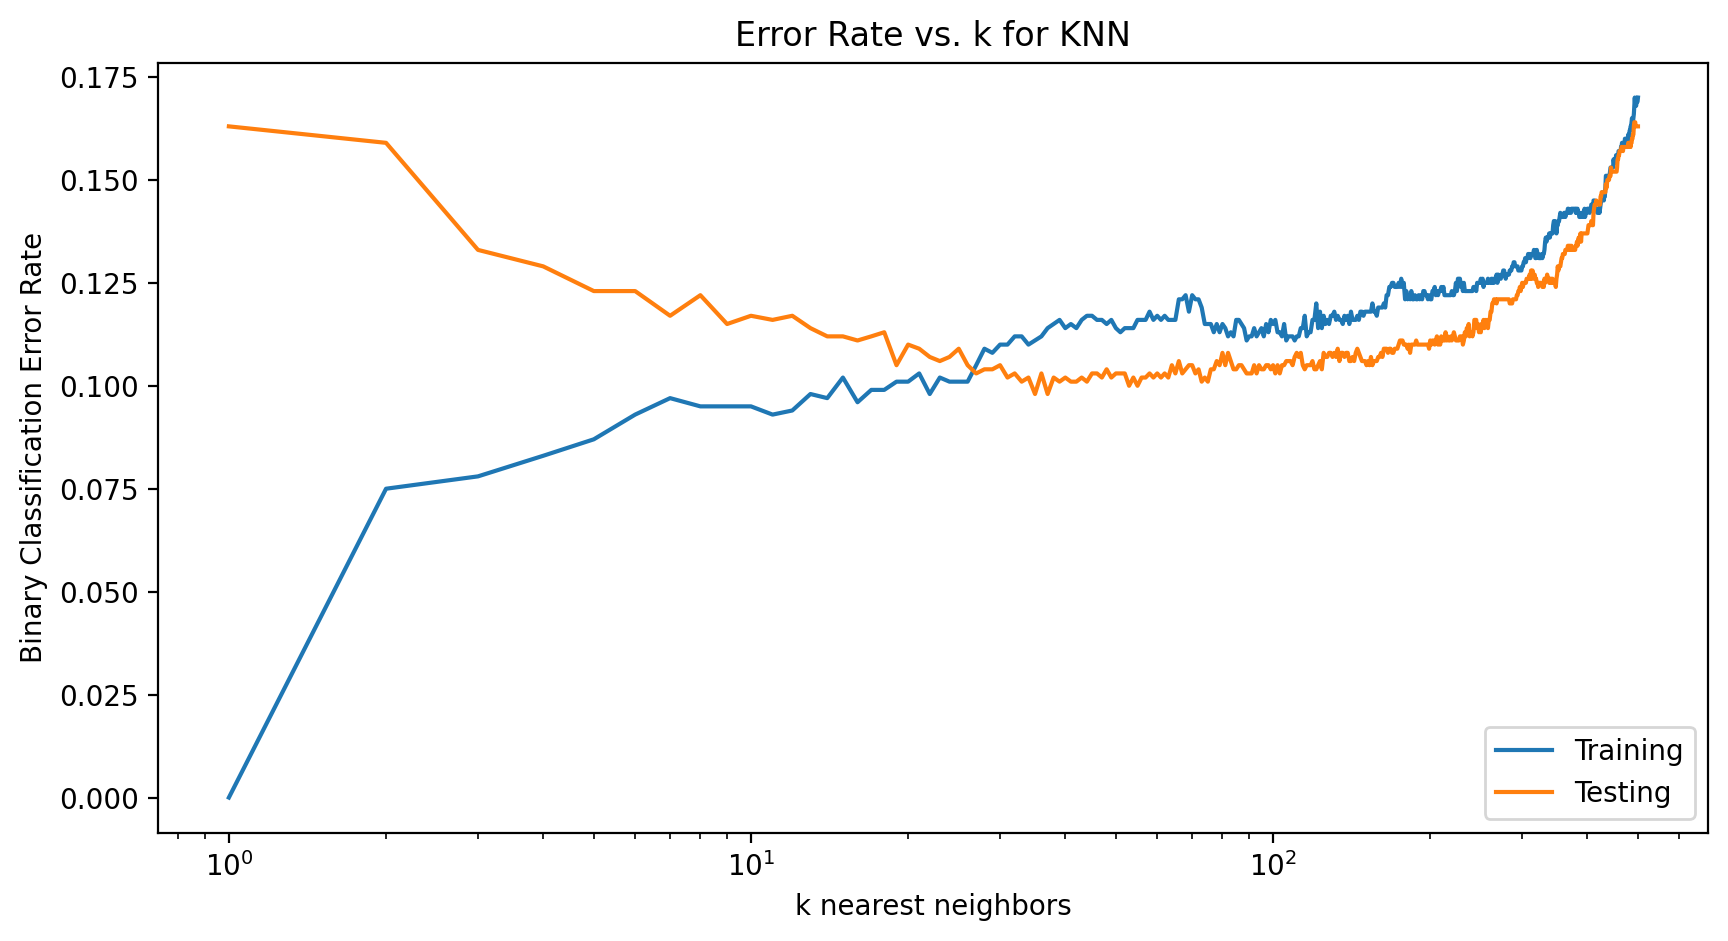

In [101]:
# Plotting the error rates
plt.figure(figsize=(10, 5))
plt.plot(range(1, 501), training_error, label="Training")
plt.plot(range(1, 501), testing_error, label="Testing")

# Log scale for x-axis (k)
plt.xscale("log")

plt.xlabel("k nearest neighbors")
plt.ylabel("Binary Classification Error Rate")
plt.title("Error Rate vs. k for KNN")
plt.legend()

plt.show()

**(c)** What trend do you see in the results?

(i) As value of $k$ increases from 0 to 500, the training error rate generally increases. 

(ii) As value of $k$ increases from 0 to 500, the testing error rate decreases at first, then increases. 

(iii) As value of $k$ increases from 0 to 500, the model becomes less flexible. Small value of $k$ tend to overfit the model with high variance and low bias. Large value of $k$ tend to underfit the model with low variance and high bias. 

**(d)** What values of $k$ represent high bias and which represent high variance?

(i) Large value of $k$ represents high bias. The $k$ represents the highest bias in the graph is $k$ = 500. 

(ii) Small value of $k$ represents high variance. The $k$ represents the highest variance in the graph is $k$ = 0. 


**(e)** What is the optimal value of $k$ and why?

In [102]:
# find the index of the lowest testing error
min_error_index = np.argmin(testing_error)
k = min_error_index + 1
print(f"The optimal value of k is {k} " f"because it minimizes the testing error.")

The optimal value of k is 35 because it minimizes the testing error.


The optimal value of k is 35 because it minimizes the testing error, thereby optimizing generalization performance by achieving a balance in the bias-variance trade-off.

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

In general, the flexibility of models is controlled by hyperparameters, which are external configurations to the model that aren't learned from the data but are set prior to the training process. The hyperparameters establishes the conditions under which the model learns, thereby determining its overall flexibility. For instance, in a KNN classifier, the value of $k$ acts as a hyperparameter that influences the model's flexibility. Similarly, in linear regression, hyperparameters can include the number of features, additional transformed features (such as higher-degree polynomial features), or interaction terms. By tuning these hyperparameters, such as by adding more features, incorporating additional transformed features, or including interaction terms, the linear regression model can become more adaptable. In the case of logistic regression, the hyperparameters consist of the number of features and the inclusion of polynomial features or other transformations of the input features. Adding polynomial terms or interaction terms can make the decision boundary in logistic regression non-linear, making the model more flexible to enhance the model's ability to fit more complex datasets.

---

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

**ANSWER**

**(a)** Create a scatter plot of the training data.

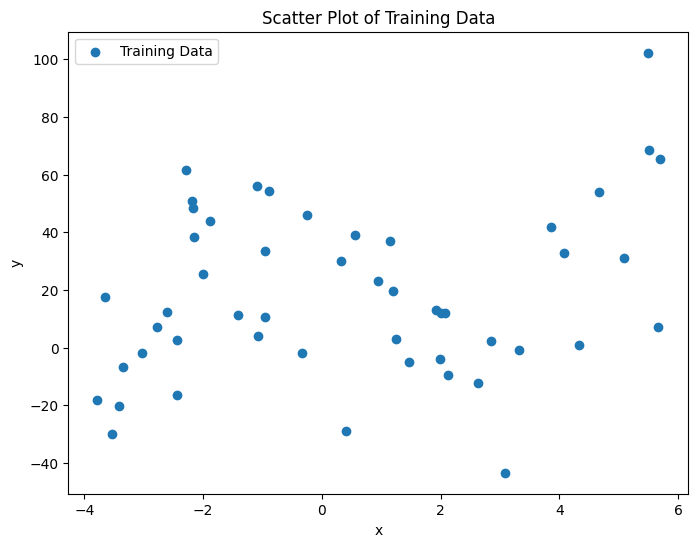

In [10]:
train = pd.read_csv("A2_Q7_train.csv")
test = pd.read_csv("A2_Q7_test.csv")

x_train = train.x.values
y_train = train.y.values

x_test = test.x.values
y_test = test.y.values

# create a scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label="Training Data")
plt.title("Scatter Plot of Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

In [11]:
# transform x_train to be a 2D array
x_train_reshaped = x_train.reshape(-1, 1)

# Estimate a linear regression model for the training data
reg_linear = LinearRegression().fit(x_train_reshaped, y_train)

# Calculate R^2 for the training data
r_square_linear = reg_linear.score(x_train_reshaped, y_train)

# Calculate MSE for the training data
y_hat_train_linear = reg_linear.predict(x_train_reshaped)
mse_linear = mean_squared_error(y_train, y_hat_train_linear)

# coefficient and intercept
a1_linear = reg_linear.coef_[0]
a0_linear = reg_linear.intercept_

# Pequation representing the estimated model with the estimated coefficients inserted
linear_equation = f"y = {a0_linear:.2f} + {a1_linear:.2f}x"

print(
    f"The R^2 value for the fit of the linear model "
    f"for the training data is {r_square_linear:.2f}."
)
print(
    f"The mean squared error for the fit of the linear model "
    f"for the training data is {mse_linear:.2f}."
)
print(
    f"The equation representing the estimated linear model "
    f"with the estimated coefficients inserted is {linear_equation}."
)

The R^2 value for the fit of the linear model for the training data is 0.06.
The mean squared error for the fit of the linear model for the training data is 791.42.
The equation representing the estimated linear model with the estimated coefficients inserted is y = 17.20 + 2.59x.


The equation representing the estimated linear model with the estimated coefficients inserted is $$y = 17.20 + 2.59x$$

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

From the scatter plot, it seems like a polynomial regression will fit the data. The trends from the data plots seem to increase at first, then decrease, then increase again, which suggests the need for at least 2 tunring points, which typically means a polynomial of degree 3 or higher. A cubic polynomial could potentially describe such a curve. 

My estimated equation for this multiple regression model is:

$$y=a_0+a_1 x+a_2 x^2+a_3 x^3$$

In [12]:
# Transform x_train to include polynomial terms up to x^3
poly = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly.fit_transform(x_train_reshaped)

# Estimate a linear regression model on the polynomial features
reg_poly = LinearRegression().fit(x_train_poly, y_train)

# Calculate R^2 for the training data
r_square_poly = reg_poly.score(x_train_poly, y_train)

# Calculate MSE for the training data
y_hat_train_poly = reg_poly.predict(x_train_poly)
mse_poly = mean_squared_error(y_train, y_hat_train_poly)

# Coefficients and intercept
coefficients_poly = reg_poly.coef_
a0_poly = reg_poly.intercept_

# Equation representing the estimated model with the estimated coefficients inserted
terms = [f"{coef:.2f}x^{i}" for i, coef in enumerate(coefficients_poly, start=1)]
poly_equation = "y = {:.2f} + ".format(a0_poly) + " + ".join(terms)

print(
    f"The R^2 value for the fit of the polynoial model "
    f"for the training data is {r_square_poly:.2f}."
)
print(
    f"The mean squared error for the fit of the polynomial model "
    f"for the training data is {mse_poly:.2f}."
)
print(
    f"The equation representing the estimated polynomial model "
    f"with the estimated coefficients inserted is {poly_equation}."
)

The R^2 value for the fit of the polynoial model for the training data is 0.40.
The mean squared error for the fit of the polynomial model for the training data is 510.88.
The equation representing the estimated polynomial model with the estimated coefficients inserted is y = 24.16 + -9.25x^1 + -2.13x^2 + 0.90x^3.


The equation representing the estimated polynomial model with the estimated coefficients inserted is $$y = 24.16 - 9.25x - 2.13x^2 + 0.90x^3$$.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

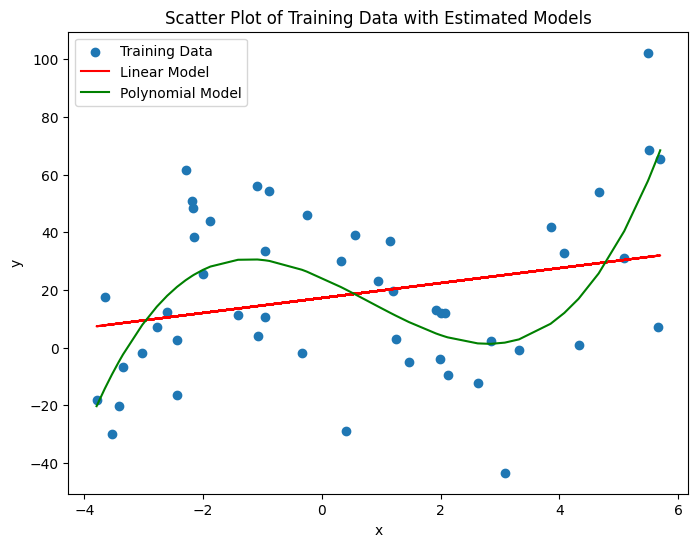

In [13]:
# Sort the x_train and corresponding y_hat_train_poly
# for a smooth polynomial curve
# Create a combined array of x_train and y_hat_train_poly
combined = np.column_stack((x_train, y_hat_train_poly))

# Sort the combined array by the first column (x_train)
combined_sorted = combined[combined[:, 0].argsort()]

# Separate the sorted x_train and y_hat_train_poly
x_train_sorted = combined_sorted[:, 0]
y_hat_train_poly_sorted = combined_sorted[:, 1]

# create a scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label="Training Data")
# insert the estimated linear model into the scatter plot
plt.plot(x_train, y_hat_train_linear, color="red", label="Linear Model")
# insert the estimated polynomial model into the scatter plot
plt.plot(
    x_train_sorted,
    y_hat_train_poly_sorted,
    color="green",
    label="Polynomial Model",
)
plt.title("Scatter Plot of Training Data with Estimated Models")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

In [14]:
# linear model for the test data
x_test_reshaped = x_test.reshape(-1, 1)
# Calculate R^2 for the test data
r_square_linear_test = reg_linear.score(x_test_reshaped, y_test)
# Calculate MSE for the test data
y_hat_test_linear = reg_linear.predict(x_test_reshaped)
mse_linear_test = mean_squared_error(y_test, y_hat_test_linear)
print(
    f"The R^2 value for the fit of the linear model "
    f"for the test data is {r_square_linear_test:.2f}."
)
print(
    f"The mean squared error for the fit of the linear model "
    f"for the test data is {mse_linear_test:.2f}."
)

# polynomial model for the test data
x_test_poly = poly.fit_transform(x_test_reshaped)
# Calculate R^2 for the test data
r_square_poly_test = reg_poly.score(x_test_poly, y_test)
# Calculate MSE for the test data
y_hat_test_poly = reg_poly.predict(x_test_poly)
mse_poly_test = mean_squared_error(y_test, y_hat_test_poly)
print(
    f"The R^2 value for the fit of the polynomial model "
    f"for the test data is {r_square_poly_test:.2f}."
)
print(
    f"The mean squared error for the fit of the polynomial model "
    f"for the test data is {mse_poly_test:.2f}."
)

The R^2 value for the fit of the linear model for the test data is -0.13.
The mean squared error for the fit of the linear model for the test data is 1116.66.
The R^2 value for the fit of the polynomial model for the test data is 0.23.
The mean squared error for the fit of the polynomial model for the test data is 759.50.


**(f)** Which models perform better on the training data, and which on the test data? Why?

In [15]:
# conclusion prints statements for the linear model
print(f"Linear Model:")
print(f"training data:")
print(f"R^2 : {r_square_linear:.2f}")
print(f"MSE : {mse_linear:.2f}")
print(f"test data:")
print(f"R^2 : {r_square_linear_test:.2f}")
print(f"MSE : {mse_linear_test:.2f}")

# conclusion prints statements for the polynomial model
print(f"Polynomial Model:")
print(f"training data:")
print(f"R^2 : {r_square_poly:.2f}")
print(f"MSE : {mse_poly:.2f}")
print(f"test data:")
print(f"R^2 : {r_square_poly_test:.2f}")
print(f"MSE : {mse_poly_test:.2f}")

Linear Model:
training data:
R^2 : 0.06
MSE : 791.42
test data:
R^2 : -0.13
MSE : 1116.66
Polynomial Model:
training data:
R^2 : 0.40
MSE : 510.88
test data:
R^2 : 0.23
MSE : 759.50


The metrics we used for analyzing the performance between the two models are $R^2$ and MSE (Mean Squared Error) for both training and testing data. In general, the polynomial model performs better on both training data and testing data. 

For training data, the polynomial model has a higher $R^2$ value (0.40 vs. 0.06) and a lower MSE value (510.88 vs. 791.42) than the linear model. A higher $R^2$ indicates that the polynomial model explains a greater proportion of the variance in the dependent variable based on its independent variables. A lower MSE indicates that there is a lower average squared difference between the observed actual outcomes and the outcomes predicted by the polynomial model. Therefore, the polynomial model has better model performance on training data with a larger $R^2$ and a lower MSE value than the linear model. 

For testing data, the polynomial model has a higher $R^2$ value (0.23 vs. -0.13) and a lower MSE value (759.50 vs. 1116.66) than the linear model. The positive $R^2$ value for the polynomial model suggests that it has predictive ability and generalizes better to unseen data compared to the linear model. In contrast, the negative $R^2$ value for the linear model indicates poor predictive ability and potentially overfitting to the noise in the training data rather than capturing the underlying trend. The lower MSE indicates that there is a lower average squared difference between the observed actual outcomes and the outcomes predicted by the polynomial model on test data, suggesting better generalization performance of the polynomial model to unseen data compared to the linear model. Therefore, the polynomial model has better model performance on testing data with a larger $R^2$ and a lower MSE value than the linear model. 

As a conclusion, The polynomial model, due to its more complex nature, can capture more complex relationships between the independent variable and the dependent variable than the linear model. This ability allows it to perform better on both training and test datasets. The superior performance of the polynomial model implies that the relationship between the independent variable and the dependent variable is non-linear. 

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

If the test data were significantly different from the training dataset, the predictive capability of the model would generally decrease. The accuracy of the generalization performance of the model would generally decrease. If the model has high flexibility (high variance), it might overfit the training data, capturing noise or patterns specific only to that training data. When faced with a significantly different test dataset, the model's predictions are likely to be less accurate because the patterns it learned during training do not apply to the new data. If the model had low flexibility (high bias), it might not capture all the complexities of the training data. If the test data are different in ways that require understanding these complexities, the model's predictions are likely to be less accurate because it has not learned enough from the training data.

---

## Citation 

Brownlee, J. (2020, February 23). Develop K-nearest neighbors in python from scratch. MachineLearningMastery.com. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ 

EpochConverter. (n.d.). Week numbers for 2012. https://www.epochconverter.com/weeks/2012 

How to plot a decision boundary for machine learning algorithms in Python. HackerNoon. (n.d.). https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07 

Shafi, A. (2023, February 20). K-Nearest Neighbors (KNN) classification with scikit-learn. DataCamp. https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn 

I used ChatGPT to check my grammer in Question 1, Question 3 (d), Question 4 (e), Question 5 (f), Question 6 (f), Question 7 (f) (g) with the prompt, “Revise the grammer in the following paragraph {}”